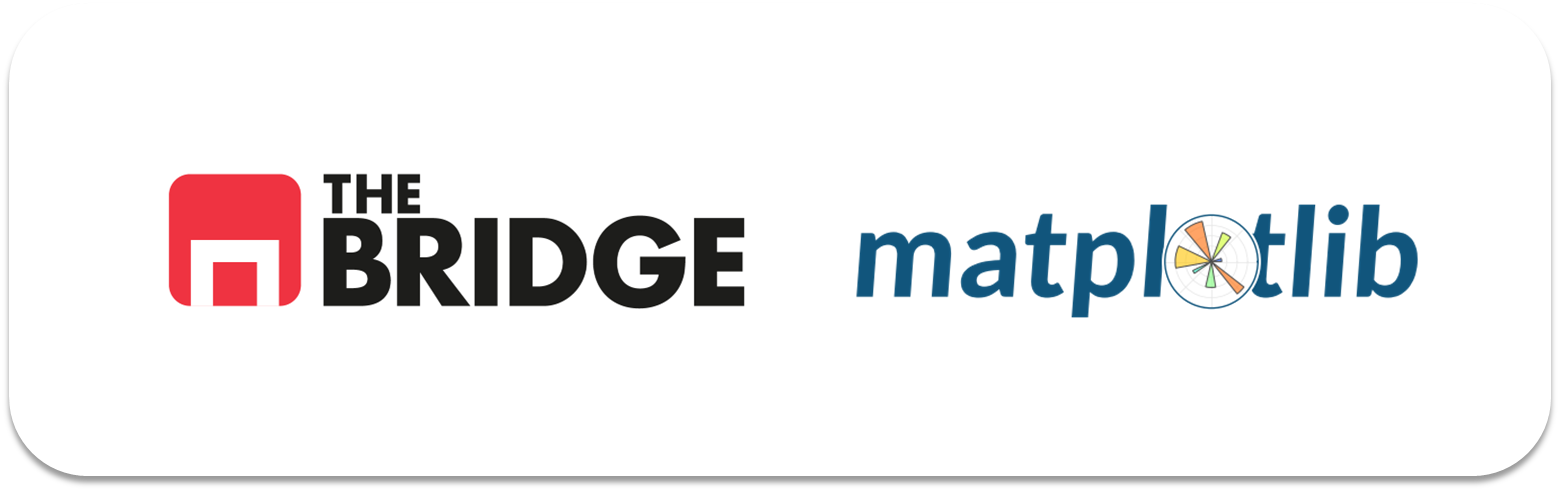

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import requests
from io import BytesIO

In [28]:
# uso %matplotlib inline
%matplotlib inline
sns.set_theme()

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [ ]:
response = requests.get(r"https://raw.githubusercontent.com/CanaryBrianArmas/DS_TheBridgue_Octubre24_Exercises/refs/heads/main/03_Analisis_de_Datos/Sprint_08/Unidad_01/Practica_Obligatoria/data/california_cities.csv")

In [5]:
response.status_code

200

In [11]:
csv_data = BytesIO(response.content)
df_orig = pd.read_csv(csv_data)

In [18]:
df_orig.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

In [22]:
df_orig.sort_values(by = 'population_total', ascending = False).head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
239,239,LosAngeles,34.050000,-118.250000,71.0,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70
367,367,SanDiego,32.715000,-117.162500,6.0,3.0,1345895,372.400,325.190,47.210,964.510,842.230,122.270,12.68
375,375,SanJose,37.333333,-121.900000,26.0,NaN,1000536,179.970,176.526,3.439,466.109,457.201,8.908,1.91
370,370,SanFrancisco,37.783333,-122.416667,NaN,52.0,837442,231.890,46.870,185.020,NaN,NaN,NaN,80.00
150,150,Fresno,36.750000,-119.766667,NaN,308.0,509039,112.308,111.957,0.351,290.877,289.967,0.910,0.31


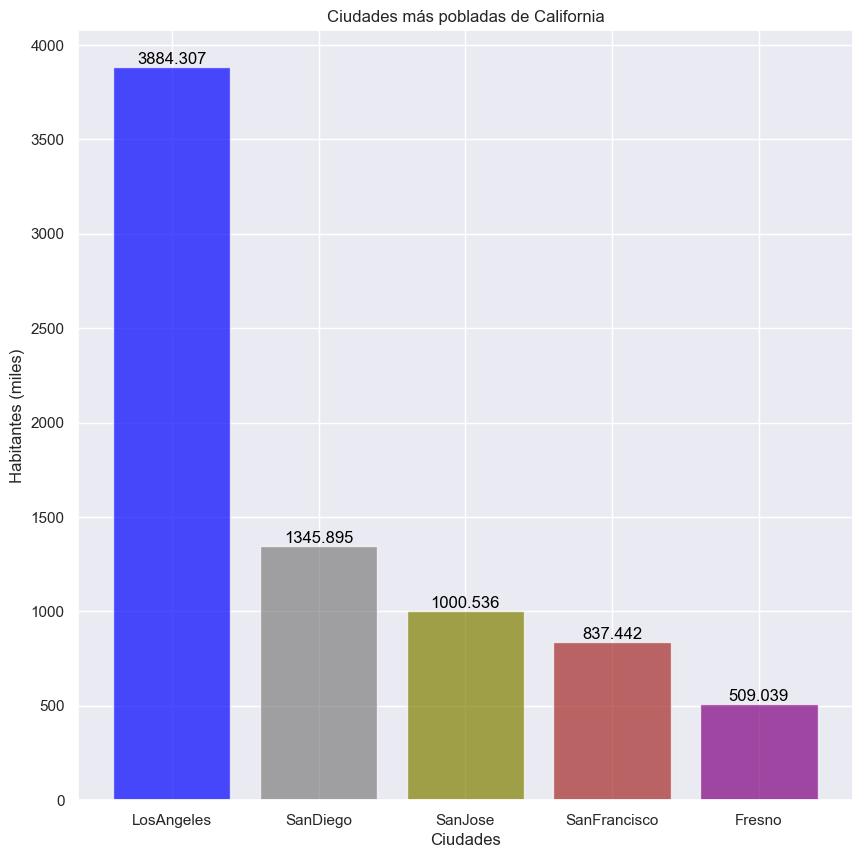

In [ ]:
# GRÁFICO DE BARRAS DE LAS CIUDADES MÁS POBLADAS

# Ordenar por población y seleccionar las 5 ciudades más pobladas
top_cities = df_orig.sort_values(by = 'population_total', ascending = False).head()

# Colores para las barras
colors = ['blue', 'gray', 'olive', 'brown', 'purple']

# Crear el gráfico
plt.figure(figsize = (10, 10))
bars = plt.bar(top_cities['city'], top_cities['population_total'] / 1000,
                 color = colors, alpha = 0.7)

# Añadir las etiquetas en el centro
for bar, value in zip(bars, top_cities['population_total']):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value / 1000}',
        ha = 'center', va = 'bottom', color = 'black'
    )

plt.xlabel('Ciudades')
plt.ylabel("Habitantes (miles)")
plt.title('Ciudades más pobladas de California')
plt.show()


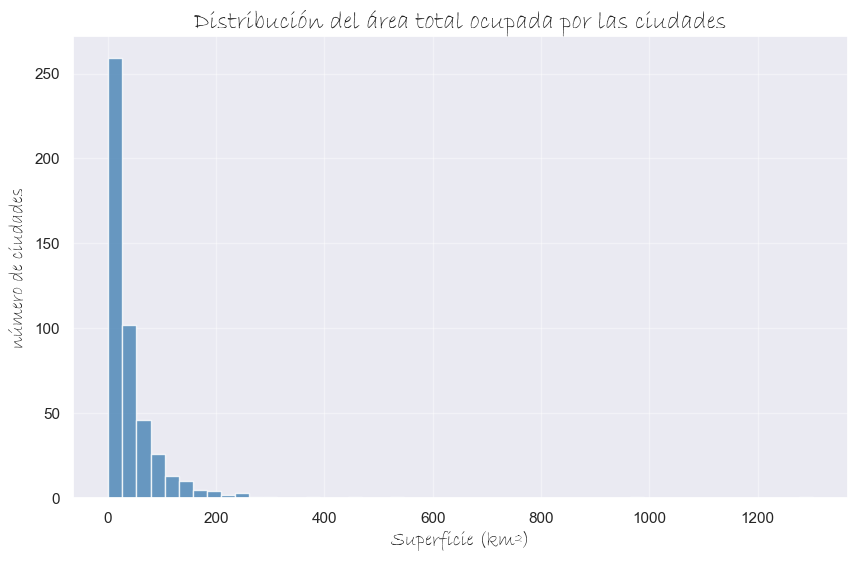

In [46]:
# HISTOGRAMA AREA DE LAS CIUDADES
plt.figure(figsize = (10, 6))
plt.hist(df_orig['area_total_km2'], bins = 50, color = 'steelblue', alpha = 0.8)

# Personalizar el gráfico
plt.title('Distribución del área total ocupada por las ciudades', fontsize = 18,
           fontname = "Bradley Hand ITC")
plt.xlabel('Superficie (km²)', fontsize = 14, fontname = "Bradley Hand ITC")
plt.ylabel('número de ciudades', fontsize = 14, fontname = "Bradley Hand ITC")
plt.grid(alpha = 0.4)

plt.show()


In [48]:
outliers = df_orig[(df_orig['area_water_km2'] > 80) & (df_orig['population_total'] > 1000000)]
outliers

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
239,239,LosAngeles,34.050,-118.2500,71.0,2.0,3884307,503.0,469.00,34.00,1302.00,1214.00,88.00,6.70
367,367,SanDiego,32.715,-117.1625,6.0,3.0,1345895,372.4,325.19,47.21,964.51,842.23,122.27,12.68


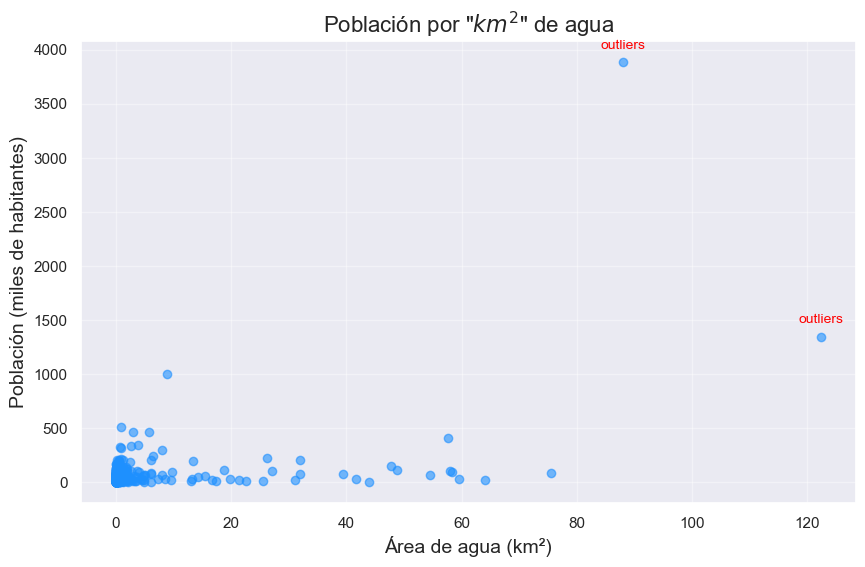

In [53]:
# SCATTER PLOT
fig, ax = plt.subplots(figsize = (10, 6))

# Crear el scatter plot
plt.scatter(df_orig['area_water_km2'], df_orig['population_total'] / 1000, color = 'dodgerblue',
             alpha = 0.6)

# Filtramos nuestros outliers
outliers = df_orig[(df_orig['area_water_km2'] > 80) & (df_orig['population_total'] > 1000000)]

# Etiquetas y título
plt.title('Población por "$km^2$" de agua', fontsize = 16)
plt.xlabel('Área de agua (km²)', fontsize = 14)
plt.ylabel('Población (miles de habitantes)', fontsize = 14)
plt.grid(alpha = 0.4)
# Anotar cada outlier en el gráfico
for index, row in outliers.iterrows():
     plt.annotate("outliers", (row['area_water_km2'], row['population_total'] / 1000),
                  textcoords = "offset points", xytext = (0, 10), ha = 'center',
                  fontsize = 10, color = 'red')

plt.show()


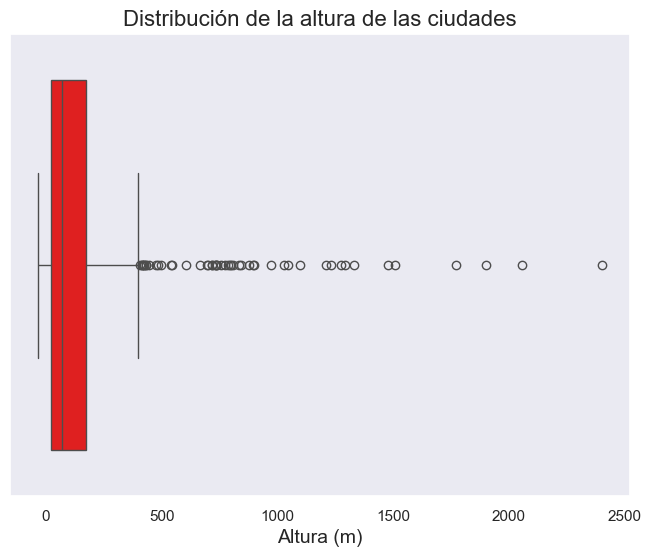

In [56]:
# BOXPLOT
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(x = df_orig['elevation_m'], color = 'red')

# Etiquetas y título
plt.title('Distribución de la altura de las ciudades', fontsize = 16)
plt.xlabel('Altura (m)', fontsize = 14)
plt.grid(axis = 'x')

plt.show()


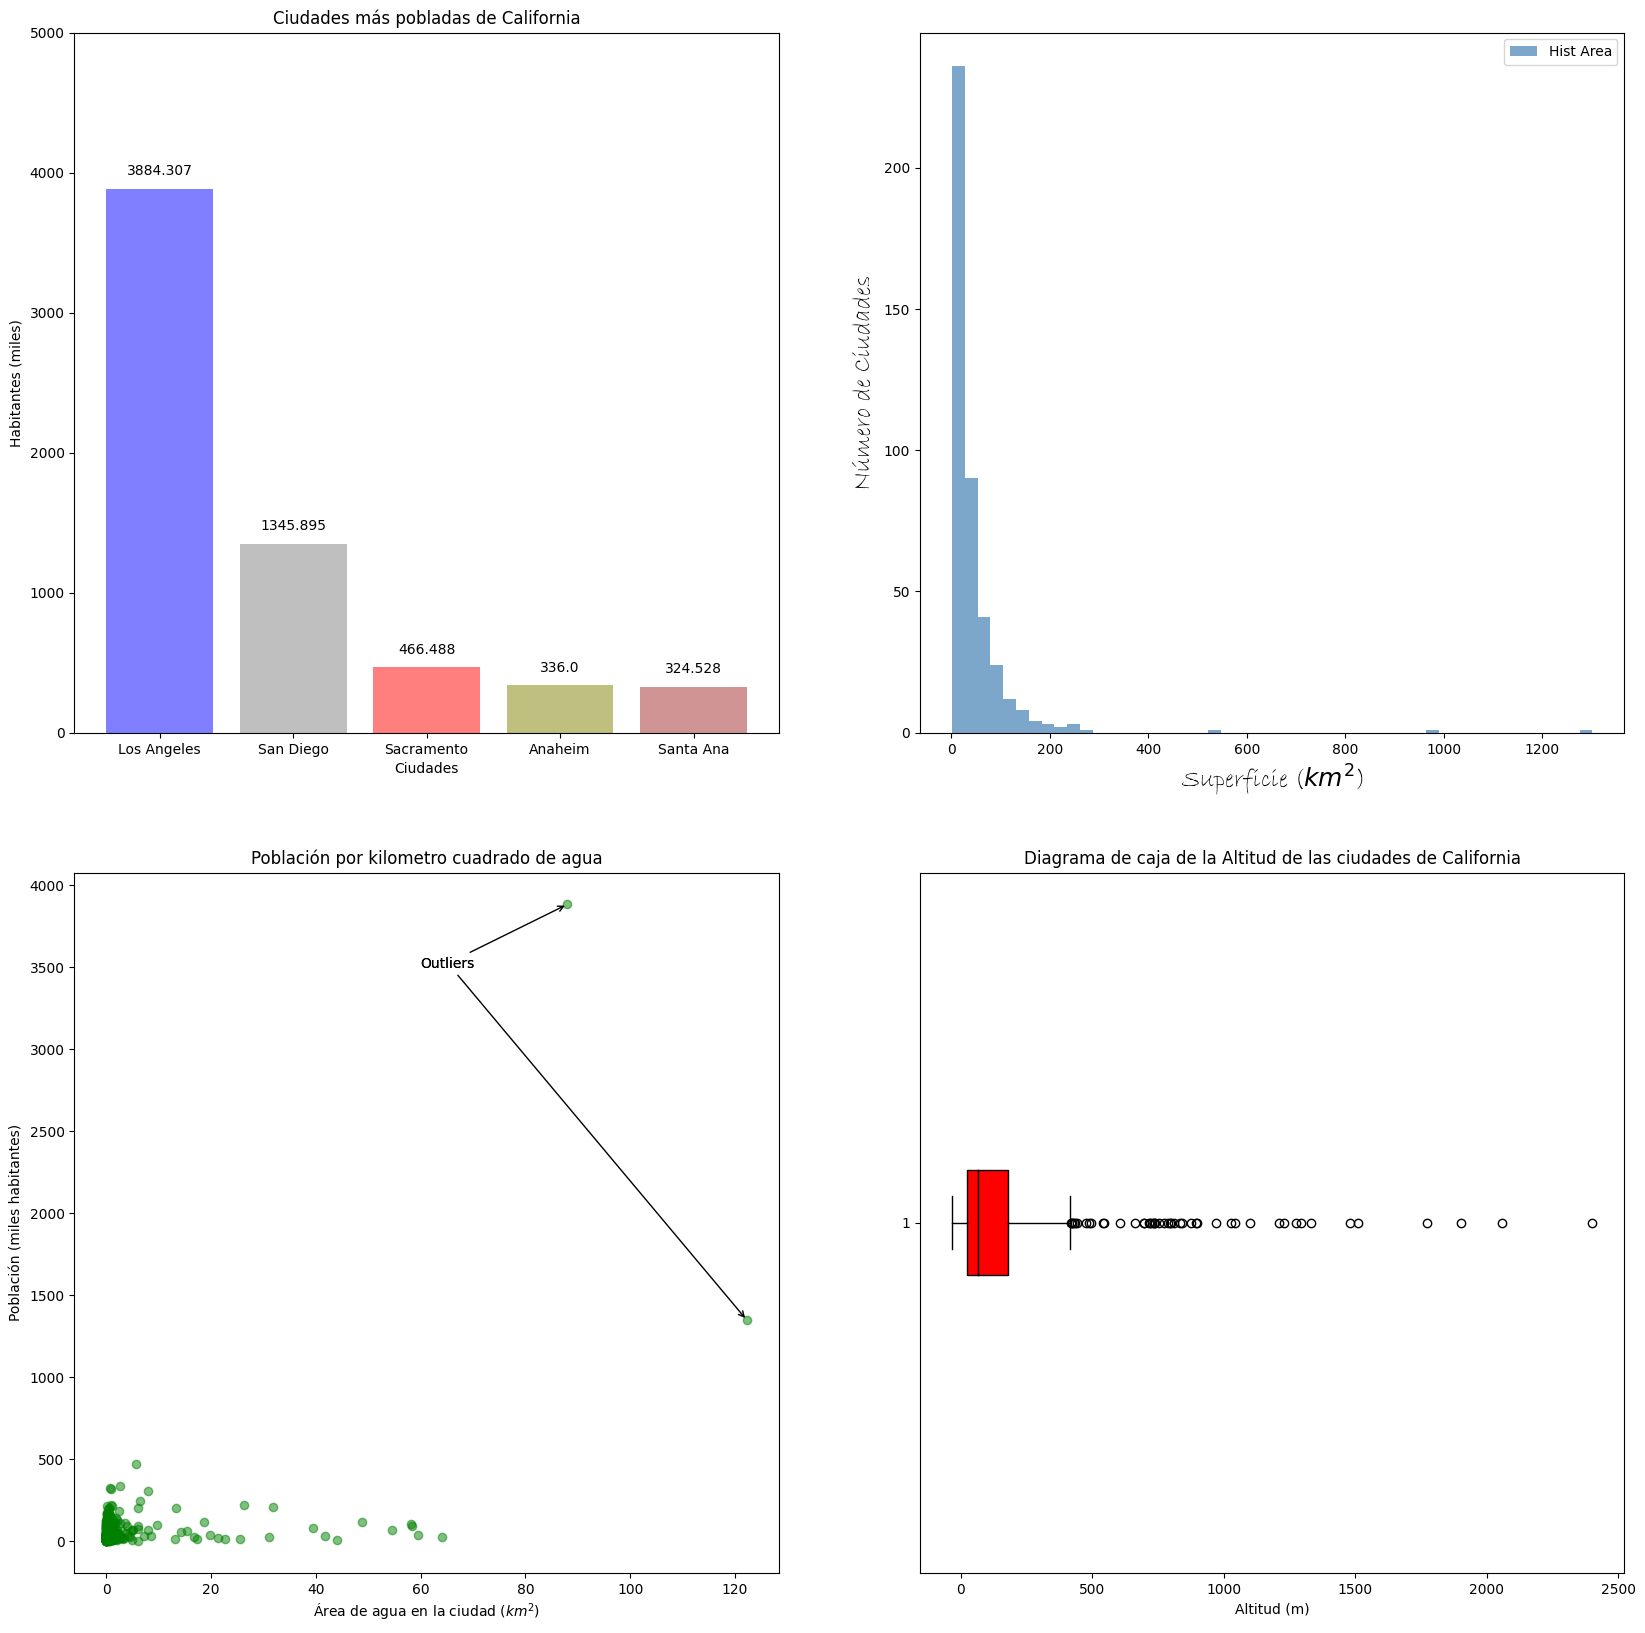

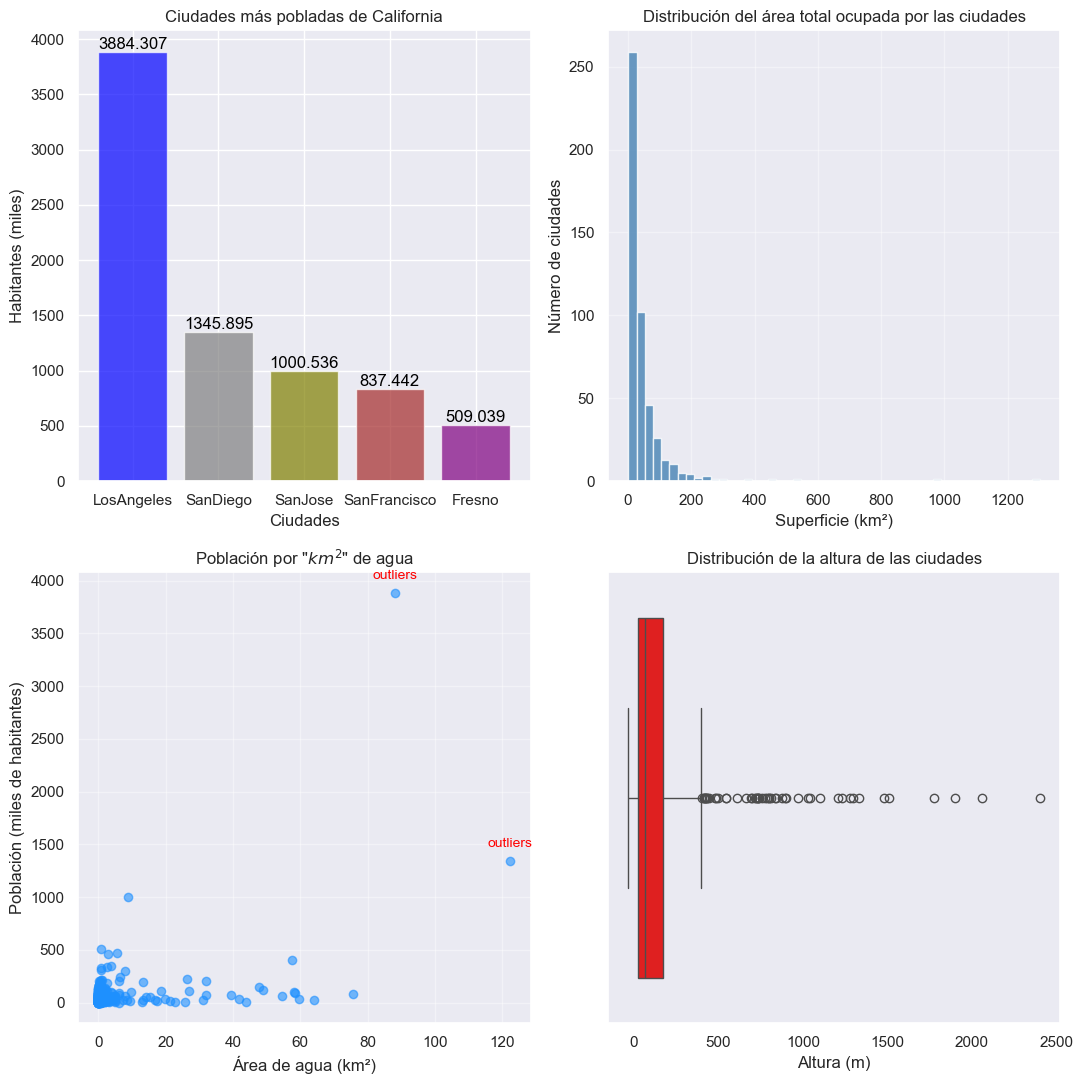

In [68]:
# Crear una figura con 4 subgráficos
fig, axs = plt.subplots(2, 2, figsize = (11, 11))

# Gráfico 1: Barras
bars = axs[0, 0].bar(top_cities['city'], top_cities['population_total'] / 1000, color=colors, alpha=0.7)
for bar, value in zip(bars, top_cities['population_total']):
    axs[0, 0].text(
        bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value / 1000:.3f}',
        ha = 'center', va = 'bottom', color = 'black'
    )
axs[0, 0].set_xlabel('Ciudades')
axs[0, 0].set_ylabel("Habitantes (miles)")
axs[0, 0].set_title('Ciudades más pobladas de California')

# Gráfico 2: Histograma
axs[0, 1].hist(df_orig['area_total_km2'], bins = 50, color = 'steelblue',
                alpha = 0.8)
axs[0, 1].set_title('Distribución del área total ocupada por las ciudades')
axs[0, 1].set_xlabel('Superficie (km²)')
axs[0, 1].set_ylabel('Número de ciudades')
axs[0, 1].grid(alpha = 0.4)

# Gráfico 3: Scatter plot
axs[1, 0].scatter(df_orig['area_water_km2'], df_orig['population_total'] / 1000,
                   color = 'dodgerblue', alpha = 0.6)

outliers = df_orig[(df_orig['area_water_km2'] > 80) & (df_orig['population_total'] > 1000000)]

for index, row in outliers.iterrows():
    axs[1, 0].annotate("outliers", (row['area_water_km2'], row['population_total'] / 1000),
                       textcoords = "offset points", xytext = (0, 10),
                         ha = 'center', fontsize = 10, color = 'red')

axs[1, 0].set_title('Población por "$km^2$" de agua')
axs[1, 0].set_xlabel('Área de agua (km²)')
axs[1, 0].set_ylabel('Población (miles de habitantes)')
axs[1, 0].grid(alpha = 0.4)

# Gráfico 4: Boxplot
sns.boxplot(ax = axs[1, 1], x = df_orig['elevation_m'], color = 'red')
axs[1, 1].set_title('Distribución de la altura de las ciudades')
axs[1, 1].set_xlabel('Altura (m)')
axs[1, 1].grid(axis = 'x')

# Ajustar los espacios entre subgráficos
plt.tight_layout()
plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [69]:
fig.savefig('graficos.png')